In [3]:
%matplotlib inline
from geopandas import GeoDataFrame
import numpy as np
import pandas as pd
import rioxarray
from shapely.geometry import Point
import xarray as xr

We want to load the soil data Rakesh provided into xarray to see how it behaves within the constraints of the tool. This cell takes all the points from one site (Grandview) and throws away all columns except the longitude, latitude, depth and Ca_Soln.

In [25]:
fname = "/Users/joseph/data/soil_point_data/soilPointDataGrandview_4ML.csv"
df = pd.read_csv(fname, header=0)
df.drop(labels=["Property", "Field", "Profile", "UTMZone", "Eastings_UTM", "Northings_UTM",
                "Eastings_AA", "Northings_AA"], axis="columns", inplace=True)
df.set_index(["Longitude", "Latitude", "mid_depth"], inplace=True)
df = df[["Ca_Soln"]]
ds = xr.Dataset.from_dataframe(df)
ds

<xarray.Dataset> Size: 9kB
Dimensions:    (Longitude: 12, Latitude: 12, mid_depth: 8)
Coordinates:
  * Longitude  (Longitude) float64 96B 150.5 150.5 150.6 ... 150.6 150.6 150.6
  * Latitude   (Latitude) float64 96B -24.34 -24.34 -24.34 ... -24.34 -24.34
  * mid_depth  (mid_depth) float64 64B 0.05 0.2 0.4 0.6 0.8 1.0 1.2 1.4
Data variables:
    Ca_Soln    (Longitude, Latitude, mid_depth) float64 9kB nan nan ... 79.7

If we treat the depth dimension as akin to the time dimension, we can take a single depth/layer and visualise.

In [26]:
ds.isel(mid_depth=0)

<xarray.Dataset> Size: 1kB
Dimensions:    (Longitude: 12, Latitude: 12)
Coordinates:
  * Longitude  (Longitude) float64 96B 150.5 150.5 150.6 ... 150.6 150.6 150.6
  * Latitude   (Latitude) float64 96B -24.34 -24.34 -24.34 ... -24.34 -24.34
    mid_depth  float64 8B 0.05
Data variables:
    Ca_Soln    (Longitude, Latitude) float64 1kB nan nan 85.25 ... nan nan 83.55

Looking at just the 2D array describing the layer, we can see it is very sparse. In fact there is only one value in each row and column.

In [27]:
da = ds.isel(mid_depth=0).to_dataarray()
da

<xarray.DataArray (variable: 1, Longitude: 12, Latitude: 12)> Size: 1kB
array([[[    nan,     nan,  85.25 ,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,  78.4  ,
             nan,     nan,     nan,     nan,     nan],
        [    nan, 230.2  ,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan, 222.35 ,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,  58.85 ,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan, 191.15 ,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,  88.55 ,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan, 171.7  ,     nan],
        [    nan,     nan,     nan,     nan,  53.05 ,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [ 42.58 ,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
          43.945,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,  83.55 ]]])
Coordinates:
  * Longitude  (Longitude) float64 96B 150.5 150.5 150.6 ... 150.6 150.6 150.6
  * Latitude   (Latitude) float64 96B -24.34 -24.34 -24.34 ... -24.34 -24.34
    mid_depth  float64 8B 0.05
  * variable   (variable) object 8B 'Ca_Soln'

Plotting the array reveals that the values are not evenly spread across the spatial dimensions

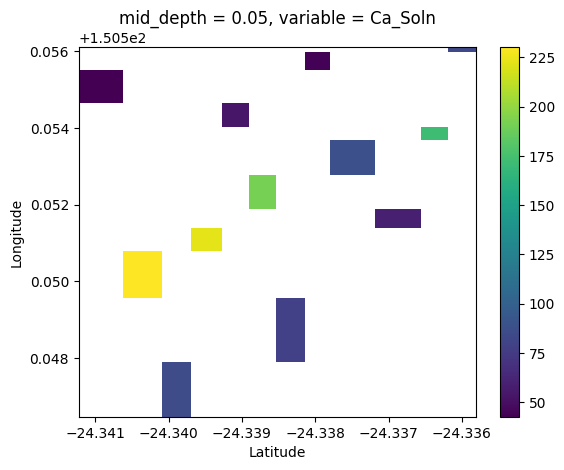

In [28]:
da.plot()

In [29]:
# rio.write_nodata()
da.rio.interpolate_na(method="nearest").write_nodata()

RioXarrayError: nodata not found. Please set the nodata with 'rio.write_nodata()'.

In [40]:
da.rio.write_nodata(np.nan, inplace=True)
da.rio.set_spatial_dims(x_dim="Longitude", y_dim="Latitude", inplace=True)
da.transpose('variable', 'Latitude', 'Longitude')

<xarray.DataArray (variable: 1, Latitude: 12, Longitude: 12)> Size: 1kB
array([[[    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,  42.58 ,     nan,     nan],
        [    nan,     nan, 230.2  ,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [ 85.25 ,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan, 222.35 ,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,  53.05 ,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan, 191.15 ,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,  78.4  ,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,  43.945,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,  88.55 ,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,  58.85 ,     nan,     nan,
             nan,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
         171.7  ,     nan,     nan,     nan,     nan],
        [    nan,     nan,     nan,     nan,     nan,     nan,     nan,
             nan,     nan,     nan,     nan,  83.55 ]]])
Coordinates:
  * Longitude  (Longitude) float64 96B 150.5 150.5 150.6 ... 150.6 150.6 150.6
  * Latitude   (Latitude) float64 96B -24.34 -24.34 -24.34 ... -24.34 -24.34
    mid_depth  float64 8B 0.05
  * variable   (variable) object 8B 'Ca_Soln'
Attributes:
    _FillValue:  nan

In [41]:
da.rio.interpolate_na(method="nearest").write_nodata()

InvalidDimensionOrder: Invalid dimension order. Expected order: ('variable', 'Latitude', 'Longitude'). You can use `DataArray.transpose('variable', 'Latitude', 'Longitude')` to reorder your dimensions.

This cell converts the csv file into a geopackage that is much easier to visualise in specialised tools such as QGIS. 

In [12]:
fname = "/Users/joseph/data/soil_point_data/GV_155_Soil_kriged_5m.csv"
df = pd.read_csv(fname, header=0)
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
df = df.drop(["Longitude", "Latitude"], axis=1)
gdf = GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)
gdf.to_file("/Users/joseph/data/soil_point_data/GV_155_Soil_kriged_5m.gpkg", driver="GPKG")